In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset_file = '../datasets/Wage.csv'
data = pd.read_csv(dataset_file, index_col=0)
data = data.drop(['region'], axis=1)
data = pd.concat([data, pd.get_dummies(data.maritl)], axis=1).drop(['maritl', '5. Separated'], axis=1)
data = pd.concat([data, pd.get_dummies(data.race)], axis=1).drop(['race', '4. Other'], axis=1)
data = pd.concat([data, pd.get_dummies(data.education)], axis=1).drop(['education', '5. Advanced Degree'], axis=1)
data['job_industrial'] = data.jobclass.apply(lambda v: 1 if v.startswith('1') else 0)
data = data.drop(['jobclass'], axis=1)
data['health_good'] = data.health.apply(lambda v: 1 if v.startswith('1') else 0)
data = data.drop(['health'], axis=1)
data['health_ins'] = data.health_ins.apply(lambda v: 1 if v.startswith('1') else 0)
data.head()

,year,age,health_ins,logwage,wage,1. Never Married,2. Married,3. Widowed,4. Divorced,1. White,2. Black,3. Asian,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,job_industrial,health_good
231655,2006,18,0,4.318063,75.043154,1,0,0,0,1,0,0,1,0,0,0,1,1
86582,2004,24,0,4.255273,70.476020,1,0,0,0,1,0,0,0,0,0,1,0,0
161300,2003,45,1,4.875061,130.982177,0,1,0,0,1,0,0,0,0,1,0,1,1
155159,2003,43,1,5.041393,154.685293,0,1,0,0,0,0,1,0,0,0,1,0,0
11443,2005,50,1,4.318063,75.043154,0,0,0,1,1,0,0,0,1,0,0,0,1


In [13]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [4]:
poly_age = PolynomialFeatures(degree=4).fit_transform(data.age.to_frame())
poly_age.shape

(3000, 5)

In [16]:
model = sm.OLS(data.wage, poly_age).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.77e-57
Time:                        12:20:55   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.002    -301.879     -66.430
x1            21.2455      5.887      3.609      0.000       9.703      32.788
x2            -0.5639      0.206     -2.736      0.006      -0.968      -0.160
x3             0.0068      0.003      2.221      0.026       0.001       0.013
x4         -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
age_for_plot = np.arange(data.age.min(), data.age.max()).reshape(-1, 1)
age_for_plot = PolynomialFeatures(degree=4).fit_transform(age_for_plot)
pred_res = model.get_prediction(age_for_plot).summary_frame()

In [46]:
pred_res.columns

Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper'],
      dtype='object')

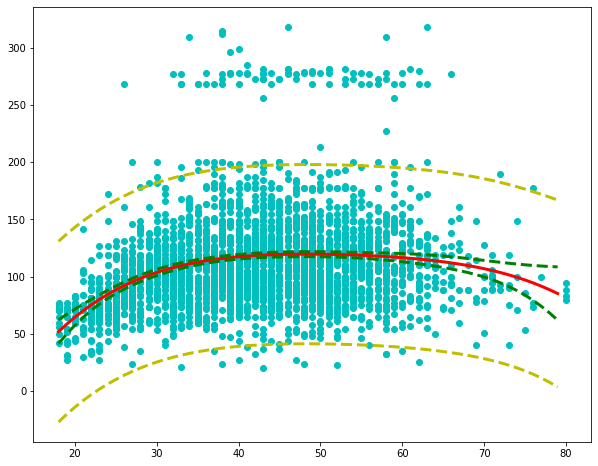

In [84]:
plt.figure(figsize=(10,8))
plt.plot(data.age, data.wage, 'o', c='c')
plt.plot(age_for_plot[:, 1], pred_res['mean'], color='r', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_lower'], 'g--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_upper'], 'g--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['obs_ci_lower'], 'y--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['obs_ci_upper'], 'y--', lw=3)

In [94]:
from statsmodels.stats.anova import anova_lm

In [100]:
model = sm.OLS(data.wage, PolynomialFeatures(degree=i).fit_transform(data.age.to_frame())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.71
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           1.67e-56
Time:                        17:34:02   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.7046    161.435     -0.308      0.758    -366.239     266.830
x1             3.9930     20.110      0.199      0.843     -35.438      43.424
x2             0.2760      0.958      0.288      0.773      -1.603       2.155
x3            -0.0126      0.022     -0.577      0.564      -0.056       0.030
x4             0.0002      0.000      0.762      0.446      -0.000       0.001
x5         -9.157e-07   1.02e-06     -0.897      0.370   -2.92e-06    1.09e-06
==============================================================================
Omnibus:                     1094.840   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4940.229
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       8.265   Cond. No.                     9.39e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
models = [sm.OLS(data.wage, PolynomialFeatures(degree=i).fit_transform(data.age.to_frame())).fit() for i in range(1, 6)]
anova_lm(*models)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [106]:
model = sm.OLS(data.wage, PolynomialFeatures(degree=5).fit_transform(data.age.to_frame())).fit()
model.pvalues

const    0.758186
x1       0.842621
x2       0.773420
x3       0.563669
x4       0.446096
x5       0.369682
dtype: float64